In [311]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [312]:
N_CLUSTERS = 5
N_SAMPLES = N_CLUSTERS * 300
N_FEATURES = 3
CLUSTER_STD = 2

data = make_blobs(n_samples=N_SAMPLES, centers=N_CLUSTERS, n_features=N_FEATURES, cluster_std=CLUSTER_STD)
colors = ['tab:red', 'tab:green', 'tab:blue', 'tab:cyan', 'tab:olive']

points = data[0]
labels = data[1]
clusters_colors = list(map(lambda x: colors[x], labels))

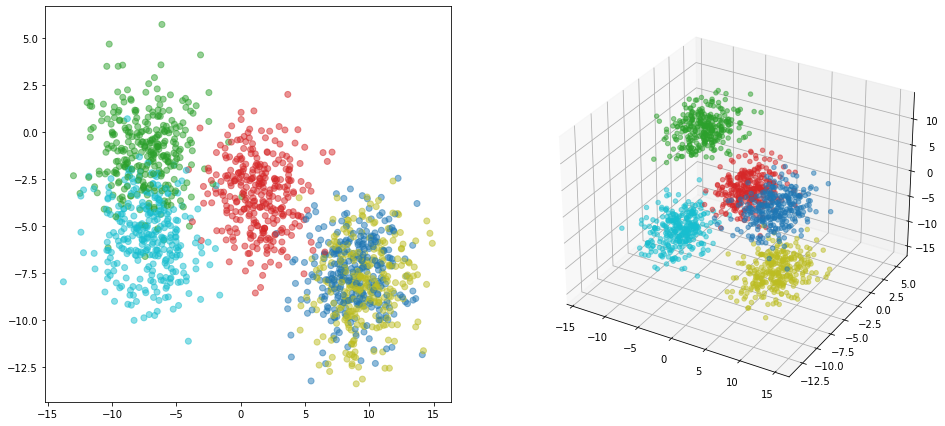

In [313]:
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2, projection='3d')

ax1.scatter(points[:,0], points[:,1], c=clusters_colors, alpha=0.5)
ax2.scatter(points[:,0], points[:,1], points[:,2], c=clusters_colors, alpha=0.5)
fig.show()

In [314]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(points)
points = scaler.transform(points)

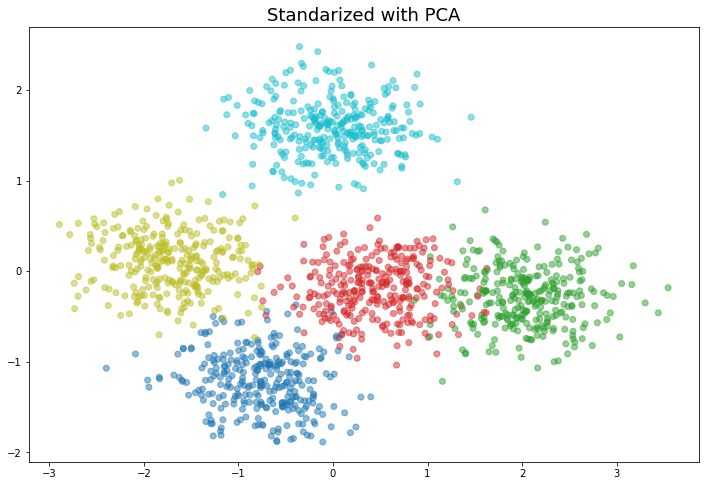

In [315]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(points)
points = pca.transform(points)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot()
ax.scatter(points[:,0], points[:,1], c=clusters_colors, alpha=0.5)
ax.set_title('Standarized with PCA', fontsize=18)

fig.show()

In [316]:
kmeans_sklearn = KMeans(n_clusters=N_CLUSTERS)
kmeans_sklearn.fit(points)
centers_sklearn = kmeans_sklearn.cluster_centers_
clusters_colors_sklearn = list(map(lambda x: colors[x], kmeans_sklearn.labels_))
centers_sklearn

array([[-0.76703361, -1.19740854],
       [ 2.05467814, -0.29319387],
       [-0.01288079,  1.58216324],
       [ 0.44817506, -0.19658872],
       [-1.71888811,  0.10836395]])

In [317]:
def get_kmeans_centers(n_clusters: int, points: np.array) -> tuple[tuple, list]:
    points = np.array(points)
    features = points.shape[1]

    maxes = [[min(points[:,feature]),max(points[:,feature])] for feature in range(features)]
    centers = np.array([list(np.random.uniform(*maxes[feature]) for feature in range(features)) for _ in range(n_clusters)])
    labels = [0 for _ in points]
    
    is_changing = True
    while is_changing:
        for point_index, point in enumerate(points):
            distances = [np.linalg.norm(point-center) for center in centers]
            label = distances.index(min(distances))
            labels[point_index] = label

        for center_index, center in enumerate(centers):
            center_points = [point for point_index, point  in enumerate(points) if labels[point_index] == center_index]
            new_center = np.mean(center_points, axis=0)
            is_changing = not (new_center == centers[center_index]).all()
            centers[center_index] = new_center

    return centers, labels

centers_own, labels_own = get_kmeans_centers(N_CLUSTERS, points)
clusters_colors_own = list(map(lambda x: colors[x], labels_own))
centers_own

array([[ 2.05467814, -0.29319387],
       [ 0.44817506, -0.19658872],
       [-1.71888811,  0.10836395],
       [-0.76703361, -1.19740854],
       [-0.01288079,  1.58216324]])

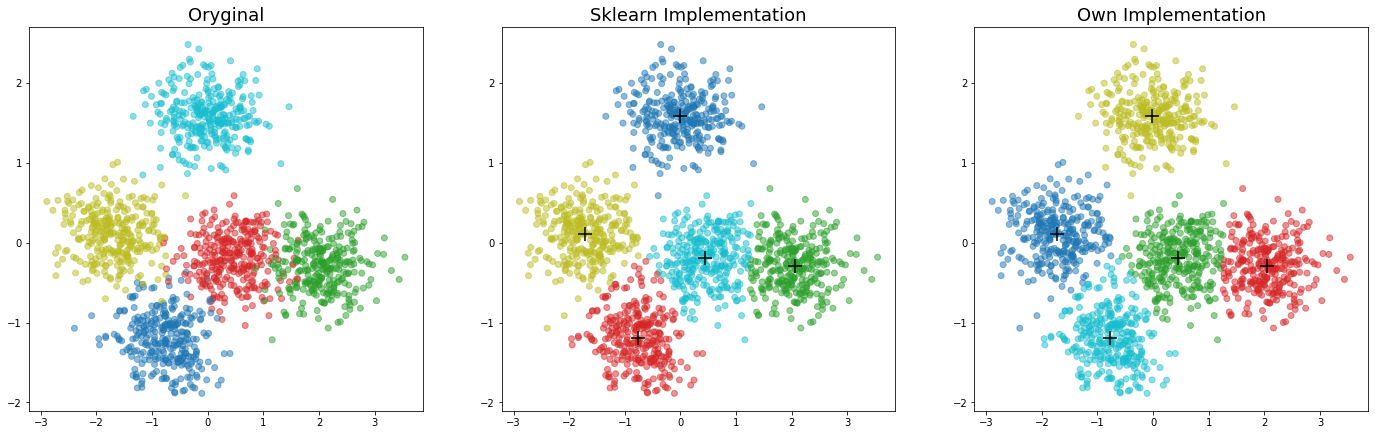

In [318]:
fig = plt.figure(figsize=(24,24))
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)

ax1.scatter(points[:,0], points[:,1], c=clusters_colors, alpha=0.5)
ax1.set_title('Oryginal', fontsize=18)

ax2.scatter(points[:,0], points[:,1], c=clusters_colors_sklearn, alpha=0.5)
ax2.scatter(centers_sklearn[:,0], centers_sklearn[:,1], s=200, marker='+', color='black')
ax2.set_title('Sklearn Implementation', fontsize=18)

ax3.scatter(points[:,0], points[:,1], c=clusters_colors_own, alpha=0.5)
ax3.scatter(centers_own[:,0], centers_own[:,1], s=200, marker='+', color='black')
ax3.set_title('Own Implementation', fontsize=18)
fig.show()

In [288]:
from matplotlib.animation import FuncAnimation
from matplotlib import rcParams
from IPython.display import HTML

def save_kmeans_centers_anim(n_clusters: int, points: np.array):
    points = np.array(points)
    features = points.shape[1]
    maxes = [[min(points[:,feature])*1.2,max(points[:,feature])*1.2] for feature in range(features)]
    centers = np.array([list(np.random.uniform(*maxes[feature]) for feature in range(features)) for _ in range(n_clusters)])
    labels = [0 for _ in points]

    fig, ax = plt.subplots(figsize=(12,12))
    clusters_colors_own = list(map(lambda x: colors[x], labels))
    points_scatter = ax.scatter(points[:,0], points[:,1], c=clusters_colors_own, alpha=0.5)
    centers_scatter = ax.scatter(centers[:,0], centers[:,1], s=200, marker='+', color='black')

    def amination_frame(i):
        for point_index, point in enumerate(points):
            distances = [np.linalg.norm(point-center) for center in centers]
            label = distances.index(min(distances))
            labels[point_index] = label

        for center_index, center in enumerate(centers):
            center_points = [point for point_index, point  in enumerate(points) if labels[point_index] == center_index]
            new_center = np.mean(center_points, axis=0)
            is_changing = not (new_center == centers[center_index]).all()
            centers[center_index] = new_center

        clusters_colors_own = list(map(lambda x: colors[x], labels))
        points_scatter.set_color(clusters_colors_own)
        centers_scatter.set_offsets(centers)
    
        return points_scatter, centers_scatter

    anim = FuncAnimation(fig, func=amination_frame, frames=30, interval=100)
    anim.save(f'anim.gif')

plt.rcParams['animation.writer'] = 'pillow'
save_kmeans_centers_anim(N_CLUSTERS, points)